In [1]:
import pandas as pd
import time
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1 读取数据并清洗

In [2]:
df= pd.read_csv("binance_funding_rate_history_full.csv")
# 1 将 fundingTime 转换为 datetime 格式
df["fundingTime"] = pd.to_datetime(df["fundingTime"], unit="ms")

# 2 按币对和时间排序，便于后续分析
df = df.sort_values(["symbol", "fundingTime"])

# 3 计算每个币对相邻记录之间的时间间隔（单位：小时），以便观察更新频率
df["funding_interval_hours"] = df.groupby("symbol")["fundingTime"].diff() / pd.Timedelta(hours=1)
df["funding_interval_hours"] = df["funding_interval_hours"].round(0)  # 直接四舍五入到整数
df["funding_interval_hours"] = df["funding_interval_hours"].bfill()  # 用后一个值填充前一个 NaN

# 4 降低浮点数精度，减小文件大小
df["fundingRate"] = df["fundingRate"].astype("float32")
df["markPrice"] = pd.to_numeric(df["markPrice"], errors="coerce").astype("float32")  # 先转换为数值，再转换为 float32
df["funding_interval_hours"] = df["funding_interval_hours"].astype("float32")

# 5 重置索引
df = df.reset_index(drop=True)

print("\n数据预览：")
display(df.head(20))
display(df.sample(n=20))


数据预览：


,symbol,fundingTime,fundingRate,markPrice,funding_interval_hours
0,1000000MOGUSDT,2024-11-07 16:00:00,0.000050,2.149868,4.0
1,1000000MOGUSDT,2024-11-07 20:00:00,0.000159,2.197892,4.0
2,1000000MOGUSDT,2024-11-08 00:00:00,0.000050,2.122600,4.0
3,1000000MOGUSDT,2024-11-08 04:00:00,0.000050,2.095098,4.0
4,1000000MOGUSDT,2024-11-08 08:00:00,0.000050,2.111100,4.0
5,1000000MOGUSDT,2024-11-08 12:00:00,0.000412,2.088002,4.0
6,1000000MOGUSDT,2024-11-08 16:00:00,0.000050,2.022297,4.0
7,1000000MOGUSDT,2024-11-08 20:00:00,0.000050,2.012600,4.0
8,1000000MOGUSDT,2024-11-09 00:00:00,0.000527,2.011614,4.0
9,1000000MOGUSDT,2024-11-09 04:00:00,0.000050,1.981400,4.0


,symbol,fundingTime,fundingRate,markPrice,funding_interval_hours
453516,IOTAUSDT,2024-04-28 16:00:00.000,0.000100,0.233700,8.0
226886,CETUSUSDT,2024-12-31 00:00:00.000,0.000050,0.301663,4.0
53352,AGLDUSDT,2023-11-17 16:00:00.001,0.000100,0.736835,8.0
716569,SFPUSDT,2023-06-25 16:00:00.000,0.000100,NaN,8.0
831894,USDCUSDT,2023-05-15 08:00:00.005,-0.000136,NaN,8.0
124200,AVAXUSDT,2021-07-30 16:00:00.000,0.000100,NaN,8.0
788740,TIAUSDC,2024-11-17 04:00:00.000,0.000112,5.127587,4.0
922160,ZRXUSDT,2022-04-15 00:00:00.008,0.000100,NaN,8.0
263504,CTSIUSDT,2024-08-30 08:00:00.000,0.000100,0.129113,8.0
841690,VETUSDT,2021-06-24 00:00:00.009,-0.000227,NaN,8.0


# 2 EDA

In [3]:
# 1 查看数据结构
df.info()
df.describe()

# df.head(10)
# df.tail(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925260 entries, 0 to 925259
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   symbol                  925260 non-null  object        
 1   fundingTime             925260 non-null  datetime64[ns]
 2   fundingRate             925260 non-null  float32       
 3   markPrice               524983 non-null  float32       
 4   funding_interval_hours  925260 non-null  float32       
dtypes: datetime64[ns](1), float32(3), object(1)
memory usage: 24.7+ MB


,fundingTime,fundingRate,markPrice,funding_interval_hours
count,925260,925260.000000,524983.000000,925260.000000
mean,2023-08-29 03:17:04.511673344,0.000074,397.389954,6.810652
min,2020-04-15 00:00:00,-0.030000,0.000000,2.000000
25%,2022-10-22 00:00:00,0.000050,0.127094,4.000000
50%,2024-01-25 08:00:00.000999936,0.000100,0.579981,8.000000
75%,2024-09-08 16:00:00,0.000100,3.146182,8.000000
max,2025-02-11 04:00:00,0.007500,107128.898438,20016.000000
std,NaN,0.000577,4932.931641,21.215883


In [4]:
# 2 处理缺失值
df.isnull().sum()

symbol                         0
fundingTime                    0
fundingRate                    0
markPrice                 400277
funding_interval_hours         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 925258 entries, 0 to 925259
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   symbol                  925258 non-null  object        
 1   fundingTime             925258 non-null  datetime64[ns]
 2   fundingRate             925258 non-null  float32       
 3   markPrice               524983 non-null  float32       
 4   funding_interval_hours  925258 non-null  float32       
dtypes: datetime64[ns](1), float32(3), object(1)
memory usage: 31.8+ MB


,fundingTime,fundingRate,markPrice,funding_interval_hours
count,925258,925258.000000,524983.000000,925258.000000
mean,2023-08-29 03:17:01.393460736,0.000074,397.389984,6.785134
min,2020-04-15 00:00:00,-0.030000,0.000000,2.000000
25%,2022-10-22 00:00:00,0.000050,0.127094,4.000000
50%,2024-01-25 08:00:00.000999936,0.000100,0.579981,8.000000
75%,2024-09-08 16:00:00,0.000100,3.146182,8.000000
max,2025-02-11 04:00:00,0.007500,107128.898438,8.000000
std,NaN,0.000577,4932.931641,1.840707


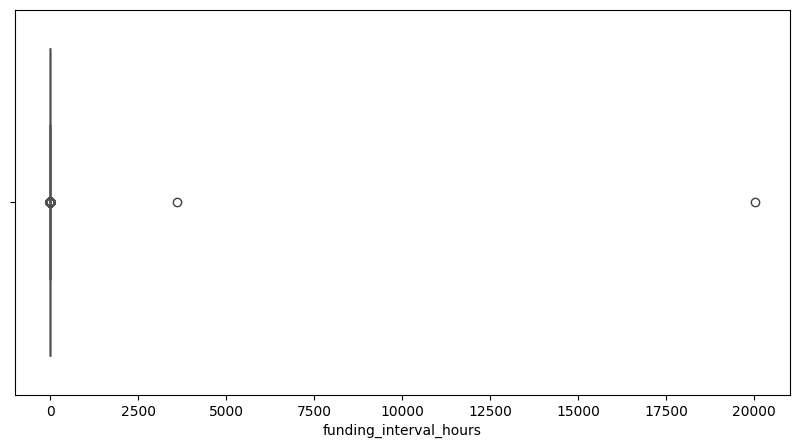

In [5]:
# 3 识别异常值
plt.figure(figsize=(10,5))
sns.boxplot(x=df["funding_interval_hours"])
# 删除 funding_time 超过 24 小时的异常数据
df = df[df["funding_interval_hours"] <= 24]

sns.boxplot(x=df["fundingRate"])
# plt.show()


# # 重新检查数据
df.info()
df.describe()

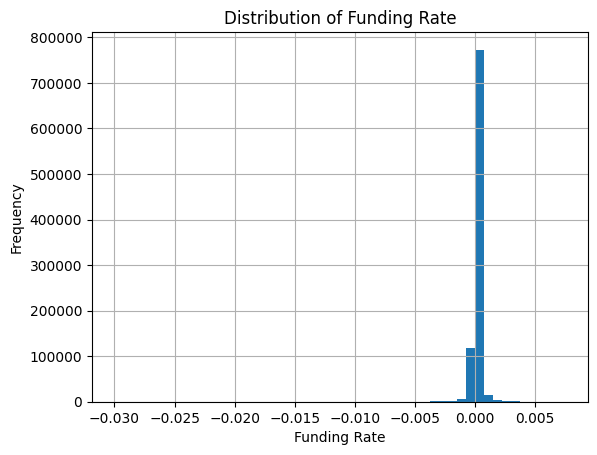

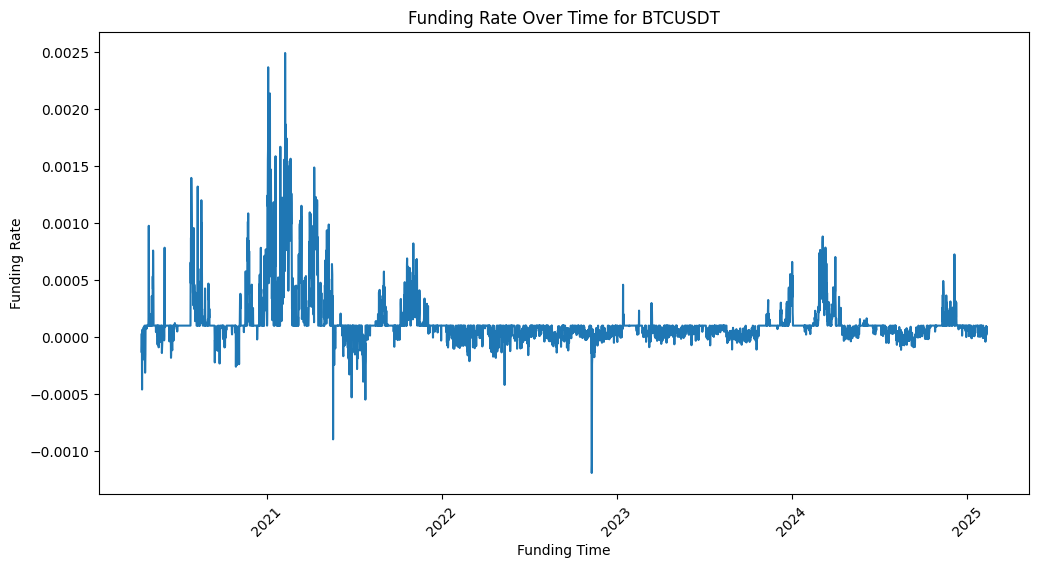

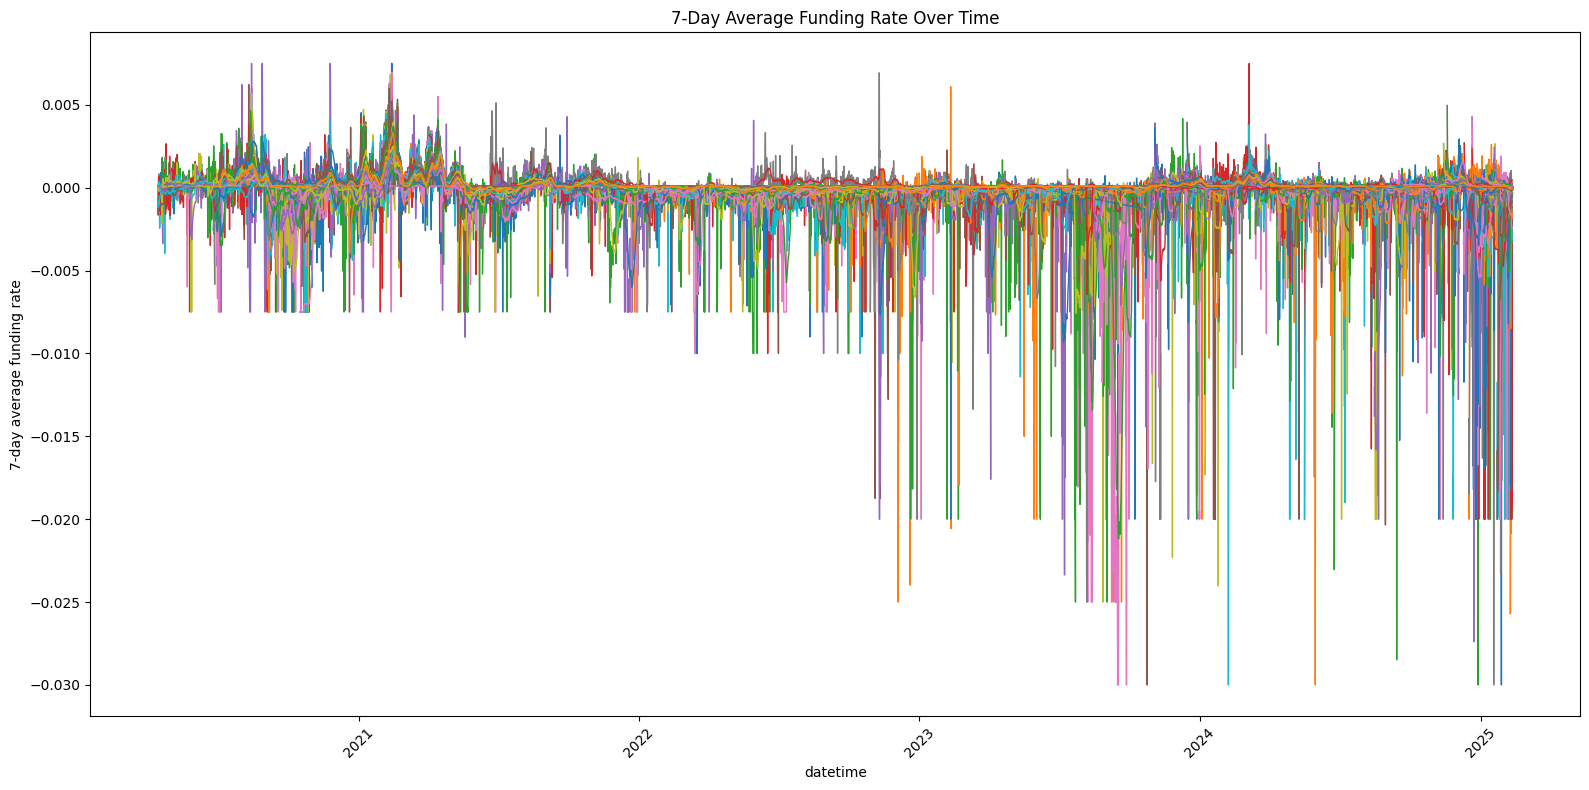

In [6]:
# 4 数据可视化
# 4.1 按币对绘制资金费率分布图
df["fundingRate"].hist(bins=50)  # 绘制 fundingRate 的直方图
plt.xlabel("Funding Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Funding Rate")
plt.show()

# 4.2 按币对绘制资金费率变化图
symbol = "BTCUSDT"  # 选择一个合约
df_symbol = df[df["symbol"] == symbol]
df_symbol = df_symbol.sort_values("fundingTime")  # 确保按时间排序

plt.figure(figsize=(12,6))
plt.plot(df_symbol["fundingTime"], df_symbol["fundingRate"])
plt.xlabel("Funding Time")
plt.ylabel("Funding Rate")
plt.title(f"Funding Rate Over Time for {symbol}")
plt.xticks(rotation=45)
plt.show()

# 4.3 绘制所有标的资金费率随时间变化的曲线
plt.figure(figsize=(16, 8))
for sym in df["symbol"].unique():
    sub_df = df[df["symbol"] == sym]
    plt.plot(sub_df["fundingTime"], sub_df["fundingRate"], label=sym, linewidth=1)

plt.xlabel("datetime")
plt.ylabel("funding rate")
plt.title("Funding Rate Over Time")

# 4.4 对每个币对分别计算 7 天滚动平均，并绘制曲线
for sym in df["symbol"].unique():
    # 筛选出当前币对的数据，并复制一份（避免 SettingWithCopyWarning）
    sub_df = df[df["symbol"] == sym].copy()
    # 确保数据按时间排序
    sub_df = sub_df.sort_values("fundingTime")
    # 将 fundingTime 设为索引，方便时间滚动计算
    sub_df.set_index("fundingTime", inplace=True)
    # 计算 7 天滚动平均，注意窗口参数 '7D' 表示 7 天
    sub_df["7d_avg"] = sub_df["fundingRate"].rolling("7D").mean()
    # 绘制 7 天滚动平均曲线
    plt.plot(sub_df.index, sub_df["7d_avg"], label=sym, linewidth=1)

plt.xlabel("datetime")
plt.ylabel("7-day average funding rate")
plt.title("7-Day Average Funding Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 5 相关性分析
# corr_matrix = df.corr()

# # 画出热力图
# plt.figure(figsize=(10,6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()

In [8]:
# 6 处理数据类别，性能优化
print(df["symbol"].value_counts())  # 统计交易对出现的次数
df["symbol"] = df["symbol"].astype("category")  # 降低内存占用

symbol
TRBUSDT       6330
FLMUSDT       6278
STMXUSDT      5750
BATUSDT       5290
NEOUSDT       5290
              ... 
VINEUSDT       107
PIPPINUSDT     107
VVVUSDT         78
BERAUSDT        28
TSTUSDT         10
Name: count, Length: 386, dtype: int64


# 3 保存数据

统一间隔变成8h

In [9]:
# 查看原始数据，确保转换正确
print("原始数据预览：")
print(df.head(200))
print(df.tail(200))

原始数据预览：
             symbol             fundingTime  fundingRate  markPrice  \
0    1000000MOGUSDT 2024-11-07 16:00:00.000     0.000050   2.149868   
1    1000000MOGUSDT 2024-11-07 20:00:00.000     0.000159   2.197892   
2    1000000MOGUSDT 2024-11-08 00:00:00.000     0.000050   2.122600   
3    1000000MOGUSDT 2024-11-08 04:00:00.000     0.000050   2.095098   
4    1000000MOGUSDT 2024-11-08 08:00:00.000     0.000050   2.111100   
..              ...                     ...          ...        ...   
195  1000000MOGUSDT 2024-12-10 04:00:00.002     0.000050   3.358143   
196  1000000MOGUSDT 2024-12-10 08:00:00.000     0.000244   3.572900   
197  1000000MOGUSDT 2024-12-10 12:00:00.000     0.000347   3.400887   
198  1000000MOGUSDT 2024-12-10 16:00:00.000     0.000196   3.082400   
199  1000000MOGUSDT 2024-12-10 20:00:00.001     0.000050   3.200275   

     funding_interval_hours  
0                       4.0  
1                       4.0  
2                       4.0  
3                  

In [10]:
pd.set_option('display.width', 300)  # 允许 200 个字符宽度

# 查看原始数据，确保转换正确
print("原始数据预览：")
print(df.head(200))
exit()

# 转换数据类型
df['fundingTime'] = pd.to_datetime(df['fundingTime'])
df['fundingRate'] = pd.to_numeric(df['fundingRate'], errors='coerce')
df['funding_interval_hours'] = pd.to_numeric(df['funding_interval_hours'], errors='coerce', downcast='integer')

# 计算8小时对齐时间（向下取整到最近的8小时整点，注意用小写 '8h'）
df['fundingTime_8h'] = df['fundingTime'].dt.floor('8h')

# 检查对齐后的时间
print("\n对齐后的时间预览：")
print(df[['fundingTime', 'fundingTime_8h']].head(10))

# 按 symbol 和 fundingTime_8h 分组，聚合规则如下：
# - fundingRate: 在同一8h窗口内累加
# - markPrice: 取最后一条记录的值（最新价格）
# - funding_interval_hours: 虽然聚合时先累加，但最后统一设为8
df_aggregated = df.groupby(['symbol', 'fundingTime_8h'], as_index=False, observed=True).agg({
    'fundingRate': 'sum',
    'markPrice': 'last',
    'funding_interval_hours': 'sum'
})

# 统一设置 funding_interval_hours 为8
df_aggregated['funding_interval_hours'] = 8

# 处理 markPrice 缺失情况：按 symbol 分组，用前一个有效值填充（避免链式赋值警告，采用赋值的方式）
df_aggregated['markPrice'] = df_aggregated.groupby('symbol')['markPrice'].ffill()

# 查看聚合结果
print("\n聚合后的数据预览：")
print(df_aggregated.head(20))

# 保存聚合后的数据到 CSV
csv_filename = "binance_funding_rate_history_full_cleaned_8h.csv"
df_aggregated.to_csv(csv_filename, index=False)
print("\n数据已成功转换，每8小时资金费率合并完成！")


原始数据预览：
             symbol             fundingTime  fundingRate  markPrice  funding_interval_hours
0    1000000MOGUSDT 2024-11-07 16:00:00.000     0.000050   2.149868                     4.0
1    1000000MOGUSDT 2024-11-07 20:00:00.000     0.000159   2.197892                     4.0
2    1000000MOGUSDT 2024-11-08 00:00:00.000     0.000050   2.122600                     4.0
3    1000000MOGUSDT 2024-11-08 04:00:00.000     0.000050   2.095098                     4.0
4    1000000MOGUSDT 2024-11-08 08:00:00.000     0.000050   2.111100                     4.0
..              ...                     ...          ...        ...                     ...
195  1000000MOGUSDT 2024-12-10 04:00:00.002     0.000050   3.358143                     4.0
196  1000000MOGUSDT 2024-12-10 08:00:00.000     0.000244   3.572900                     4.0
197  1000000MOGUSDT 2024-12-10 12:00:00.000     0.000347   3.400887                     4.0
198  1000000MOGUSDT 2024-12-10 16:00:00.000     0.000196   3.082400     

/var/folders/t7/t85zttvj4s72fpb9tpqj7r3w0000gn/T/ipykernel_69173/75195551.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aggregated['markPrice'] = df_aggregated.groupby('symbol')['markPrice'].ffill()



数据已成功转换，每8小时资金费率合并完成！


: 

In [71]:

print(f"\n所有数据已保存到文件：{csv_filename}")


所有数据已保存到文件：binance_funding_rate_history_full_cleaned_8h.csv
